In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
cameraCalibration = pickle.load(open
                                ('Camera_Calibration_Images/distortion_coefficients/camera_calibration.p',
                                 'rb' ) )
mtx, dist = map(cameraCalibration.get, ('mtx', 'dist'))

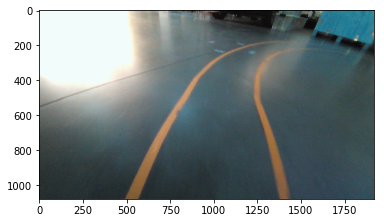

In [4]:
img = cv2.imread('test.jpg')
plt.imshow(img)

(1080, 1920)


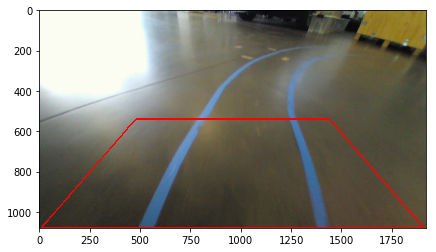

In [9]:
index = 0
original = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
undist   =original  #cv2.undistort(original, mtx, dist, None, mtx)

xSize, ySize, _ = undist.shape
copy = undist.copy()

print(xSize,ySize)

bottomY = int(xSize)
topY    = int(xSize/2)
a       = int(10)

left1 = (a, int(bottomY))
left1_x, left1_y = left1

left2 = (int(ySize/2 - ySize/4), topY)
left2_x, left2_y = left2

right1 = (int(ySize/2 + ySize/4), topY)
right1_x, right1_y = right1

right2 = (ySize-a, bottomY)
right2_x, right2_y = right2

color = [255, 0, 0]
w = 5
cv2.line(copy, left1, left2, color, w)
cv2.line(copy, left2, right1, color, w)
cv2.line(copy, right1, right2, color, w)
cv2.line(copy, right2, left1, color, w)
fig, ax = plt.subplots(figsize=(8, 4))
ax.imshow(copy)

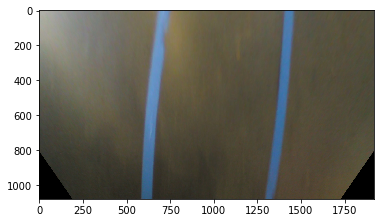

In [10]:
gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)

src  = np.float32([ 
    [left2_x, left2_y],
    [right1_x, right1_y],
    [right2_x, right2_y],
    [left1_x, left1_y]
])

nX = gray.shape[1]
nY = gray.shape[0]

img_size = (nX, nY)

offset = 200
dst    = np.float32([
    [offset, 0],
    [img_size[0]-offset, 0],
    [img_size[0]-offset, img_size[1]], 
    [offset, img_size[1]]
])
img_size = (gray.shape[1], gray.shape[0])
M        = cv2.getPerspectiveTransform(src, dst)
Minv     = cv2.getPerspectiveTransform(dst, src)
warped   = cv2.warpPerspective(undist, M, img_size)

plt.imshow(warped)

In [12]:
pickle.dump( { 'M': M, 'Minv': Minv },
            open('Camera_Calibration_Images/distortion_coefficients/perspective_transform.p',
                 'wb'))